To better understand how our users are interacting with the platform, I first calculated the total number of engaged interactions per user. This gave us a clear metric of user activity, showing how many times each individual actively engaged.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Load and inspect data
df = pd.read_csv('../data/tiktok_synthetic_data.csv')
print(df.head())

   user_id  video_id category  length_sec  watch_time_sec  liked  shared  \
0     7271      1947    dance          41              29      1       0   
1      861       621    music          41              23      0       0   
2     5391       677   gaming          52              36      1       0   
3     5192       370    music          23              17      0       1   
4     5735       771  fashion          57              41      1       0   

   commented  follow_creator    group                        date  engagement  \
0          0               0  variant  2025-07-26 11:00:15.195387           1   
1          1               0  variant  2025-08-02 11:00:15.195387           1   
2          0               0  control  2025-08-04 11:00:15.195387           1   
3          0               0  variant  2025-08-05 11:00:15.195387           1   
4          0               0  variant  2025-07-16 11:00:15.195387           1   

   engaged  
0        1  
1        1  
2        1  
3   

In [8]:
# Calculate engagement count per user
user_engagement = df.groupby('user_id')['engaged'].sum().reset_index()


Plotting this data in a histogram reveals an interesting distribution. Most users have relatively low engagement counts, indicating that while many users interact occasionally, high-frequency engagement is less common. This suggests a typical pattern where a core group of users drives most of the activity.

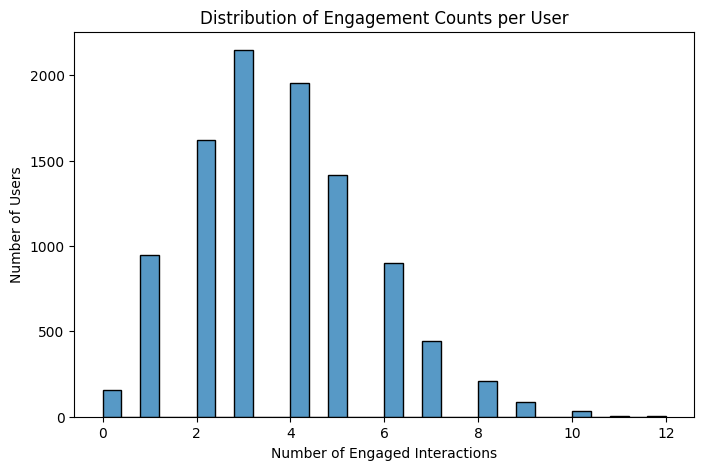

In [9]:
# Histogram of user engagement counts
plt.figure(figsize=(8,5))
sns.histplot(user_engagement['engaged'], bins=30, kde=False)
plt.title('Distribution of Engagement Counts per User')
plt.xlabel('Number of Engaged Interactions')
plt.ylabel('Number of Users')
plt.show()


To make this insight more actionable, I segmented users into four engagement levels: Low, Medium, High, and Very High, based on their total engagement counts. These groups help us identify distinct user behavior clusters—from casual participants to our most active community members.

In [10]:
# Segment users into groups
bins = [0, 1, 5, 20, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
user_engagement['engagement_level'] = pd.cut(user_engagement['engaged'], bins=bins, labels=labels, right=False)

In [11]:
# Count users in each segment
engagement_levels_count = user_engagement['engagement_level'].value_counts().sort_index()
print(engagement_levels_count)

engagement_level
Low           157
Medium       6672
High         3095
Very High       0
Name: count, dtype: int64


When counting users in each segment, we see a majority fall into the Low and Medium engagement levels, with fewer users classified as High or Very High. This tells us there’s a significant opportunity to nurture and convert medium-engagement users into higher engagement tiers through targeted campaigns or personalized experiences.

_____________

When counting users in each segment, we see a majority fall into the Low and Medium engagement levels, with fewer users classified as High or Very High. This tells us there’s a significant opportunity to nurture and convert medium-engagement users into higher engagement tiers through targeted campaigns or personalized experiences.

Overall, this segmentation allows us to tailor our strategies effectively, focusing on boosting engagement among less active users while continuing to support and reward our most dedicated users.